In [ ]:
!pip install -U finance-datareader

     |████████████████████████████████| 48 kB 2.7 MB/s 


In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [ ]:
# 2021년~현재까지의 네이버 주가를 데이터 프레임으로 불러오기
df_naver = fdr.DataReader('005930', '2018')

# 가장 마지막(최신)의 10일치 주가 출력
df_naver.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-04-05,69400,69600,69100,69200,8467248,-0.001443
2022-04-06,68600,68800,68500,68500,15517308,-0.010116
2022-04-07,68500,68500,68000,68000,20683327,-0.007299
2022-04-08,68100,68300,67700,67800,15453191,-0.002941
2022-04-11,67800,68100,67400,67900,12263735,0.001475
2022-04-12,67600,67700,67000,67000,13924389,-0.013255
2022-04-13,67300,69000,67200,68700,17378619,0.025373
2022-04-14,68700,68700,67500,67500,16409494,-0.017467
2022-04-15,67200,67300,66500,66600,13176415,-0.013333


In [ ]:
# KOSPI200, 2015년~현재
df_kospi200 = fdr.DataReader('KS200', '2018')

# 가장 마지막(최신)의 10일치 지수 출력
df_naver.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-04-05,69400,69600,69100,69200,8467248,-0.001443
2022-04-06,68600,68800,68500,68500,15517308,-0.010116
2022-04-07,68500,68500,68000,68000,20683327,-0.007299
2022-04-08,68100,68300,67700,67800,15453191,-0.002941
2022-04-11,67800,68100,67400,67900,12263735,0.001475
2022-04-12,67600,67700,67000,67000,13924389,-0.013255
2022-04-13,67300,69000,67200,68700,17378619,0.025373
2022-04-14,68700,68700,67500,67500,16409494,-0.017467
2022-04-15,67200,67300,66500,66600,13176415,-0.013333


In [ ]:
df_naver.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

In [ ]:
target = df_naver['Close']
pred = df_naver[['Open']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pred, target, test_size = 0.3, random_state = 25, shuffle=False)

DecisionTreeRegressor shows the least rmse/mae rate

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

decisiontree = DecisionTreeRegressor(random_state=77, max_depth=16)
decisiontree.fit(X_train,y_train)
y_pred_dt= decisiontree.predict(X_test)

rmse_dt = sqrt(mean_squared_error(y_pred_dt, y_test))
mae_dt = mean_absolute_error(y_pred_dt, y_test)

print(rmse_dt)
print(mae_dt)

2320.5907673336033
1718.2389937106918


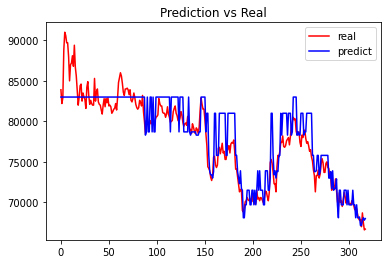

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_dt, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
from sklearn import linear_model

linear_r = linear_model.LinearRegression()
linear_r.fit(X_train, y_train)
y_pred_lr = linear_r.predict(X_test)

rmse_lr=sqrt(mean_squared_error(y_pred_lr, y_test))
mae_lr=mean_absolute_error(y_pred_lr, y_test)


print(rmse_lr)
print(mae_lr)

4712.33913942852
4545.143364644075


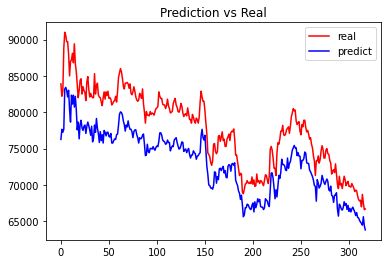

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_lr, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
linear_r.predict([[500]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([9449.6352743])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(random_state=0)
boosting.fit(X_train, y_train)
y_pred_gb=boosting.predict(X_test)

rmse_gb = sqrt(mean_squared_error(y_pred_gb, y_test))
mae_gb = mean_absolute_error(y_pred_gb, y_test)

print(rmse_gb)
print(mae_gb)

2218.416574877171
1638.714418045299


In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_GBR = GridSearchCV(estimator=boosting, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=500,
                          random_state=0, subsample=0.5)

 The best score across ALL searched params:
 0.4676992752773713

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(random_state=0, learning_rate=0.04, max_depth=4, n_estimators=500, subsample=0.5)
boosting.fit(X_train, y_train)
y_pred_gb=boosting.predict(X_test)

rmse_gb = sqrt(mean_squared_error(y_pred_gb, y_test))
mae_gb = mean_absolute_error(y_pred_gb, y_test)

print(rmse_gb)
print(mae_gb)

2269.7887721279326
1685.8683299182544


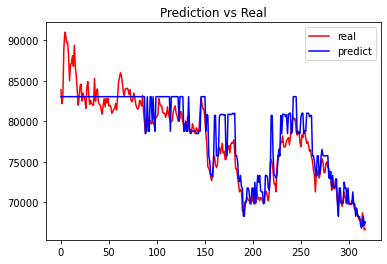

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_gb, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=77)
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)

rmse_xgb=sqrt(mean_squared_error(y_pred_xgb, y_test))
mae_xgb = mean_squared_error(y_pred_xgb, y_test)


print(rmse_xgb)
print(mae_xgb)

[14:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2242.268493254913
5027767.995843659


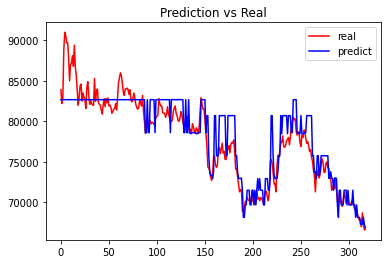

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_xgb, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=77)
lgb.fit(X_train, y_train)
y_pred_lgb= lgb.predict(X_test)

rmse_lgb=sqrt(mean_squared_error(y_pred_lgb, y_test))
mae_lgb = mean_squared_error(y_pred_lgb, y_test)

print(rmse_lgb)
print(mae_lgb)

5997.592775611675
35971119.102069356


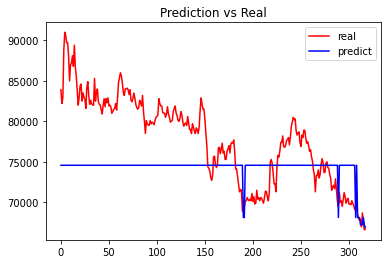

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_lgb, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

RandomForestRegressor 확인

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state=0)
randomforest.fit(X_train, y_train)
y_pred_rf =randomforest.predict(X_test)

rmse_rf = sqrt(mean_squared_error(y_pred_rf, y_test))
mae_rf = mean_absolute_error(y_pred_rf, y_test)

print(rmse_rf)
print(mae_rf)

2187.91654131388
1518.9403039832282


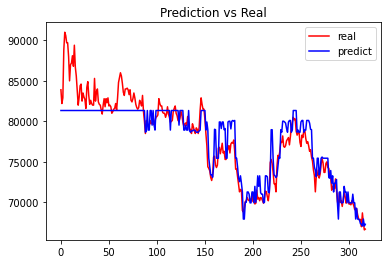

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_rf, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'sigmoid', input_shape=(1,))) #input shape -> column 개수로 맞추기
model.add(Dense(64, activation='sigmoid')) #sigmoid / tanh / relu
model.add(Dense(128, activation='sigmoid')) #sigmoid / tanh / relu
model.add(Dense(32, activation='sigmoid')) #sigmoid / tanh .relu
model.add(Dense(1,  activation='sigmoid')) 

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mean_squared_error']) #optimizer: sgd / adam / rmsprop

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
24/24 [==============================] - 1s 3ms/step - loss: 2577196032.0000 - mean_squared_error: 2577196032.0000
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 2577188864.0000 - mean_squared_error: 2577188864.0000
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 2577187840.0000 - mean_squared_error: 2577187840.0000
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 2577187072.0000 - mean_squared_error: 2577187072.0000
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 2577187328.0000 - mean_squared_error: 2577187328.0000
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 2577187584.0000 - mean_squared_error: 2577187584.0000
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 2577186816.0000 - mean_squared_error: 2577186816.0000
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 2577186560.0000 - mean_squared_error: 25771865

In [ ]:
pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

77851.78005144483


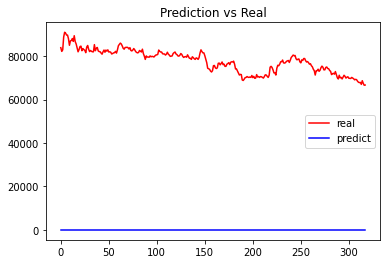

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, pred, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, RNN, GRU
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 8s 8ms/step - loss: 2577276416.0000
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 2577127424.0000
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 2576574208.0000
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 2576202752.0000
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 2576017664.0000
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 2575869952.0000
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 2575742464.0000
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: 2575619328.0000
Epoch 9/100
24/24 [==============================] - 0s 8ms/step - loss: 2575510272.0000
Epoch 10/100
24/24 [==============================] - 0s 8ms/step - loss: 2575398144.0000
Epoch 11/100
24/24 [==============================] - 0s 7ms/step - loss: 2575287808.0000
Epoch 12/100
24/24 

In [ ]:
pred= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

77747.51221052112


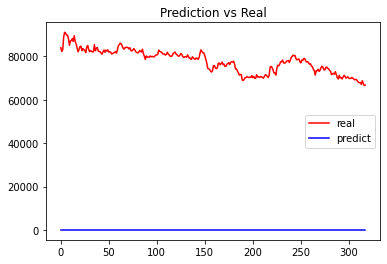

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, pred, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
!pip install pycaret

     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 51.3 MB/s 
     |████████████████████████████████| 261 kB 57.5 MB/s 
     |████████████████████████████████| 167 kB 53.0 MB/s 
     |████████████████████████████████| 116 kB 57.8 MB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 16.8 MB 420 kB/s 
     |████████████████████████████████| 88 kB 5.6 MB/s 
     |████████████████████████████████| 1.7 MB 38.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 48.5 MB/s 
     |████████████████████████████████| 3.1 MB 41.0 MB/s 
     |████████████████████████████████| 303 kB 42.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████

In [ ]:
df_naver.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [ ]:
df_naver_r = df_naver[['Open', 'Close']]

In [ ]:
df_naver_r

,Open,Close
Date,,
2018-01-02,51380,51020
2018-01-03,52540,51620
2018-01-04,52120,51080
2018-01-05,51300,52120
2018-01-08,52400,52020
...,...,...
2022-04-12,67600,67000
2022-04-13,67300,68700
2022-04-14,68700,67500


In [ ]:
df_naver_r_1 = df_naver_r[:700]
df_naver_r_2 = df_naver_r[700:]

In [ ]:
from pycaret.regression import *

clf = setup(data=df_naver_r_1, target='Close', session_id=77, train_size = 0.7)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


RuntimeError: ignored

In [ ]:
compare_models()

In [ ]:
 ml = create_model('lr', fold=5)

In [ ]:
final_model = finalize_model(ml)
prediction = predict_model(final_model, data=df_naver_r_2)

In [ ]:
naver_test = df_naver_r_2['Close']

In [ ]:
import matplotlib.pyplot as plt

epochs2 = range(len(naver_test))

plt.plot(epochs2, naver_test, 'r', label='real')
plt.plot(epochs2, prediction, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

In [ ]:
best = compare_models(sort = 'RMSE')

In [ ]:
prediction_holdout = predict_model(best);

In [ ]:
final_best = finalize_model(best)

In [ ]:
predictions_future = predict_model(final_best, data=df_naver_r_2)
predictions_future.head()

In [ ]:
predictions_future.head()

In [ ]:
concat_df = pd.concat([df_naver_r_1,predictions_future], axis=0)

fig = px.line(concat_df, x=concat_df.index, y=["Close", "Label"], template = 'plotly_dark')
fig.show()